### CS146 Assignment 4.

In [213]:
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
sns.set()

In [214]:
#import control group data, and calculate success rate in six groups
patients_control = np.array([15,18,10,39,29,10])
improved_control = np.array([9,11,4,21,12,0])
success_p_control = improved_control/patients_control
# standard deviation of the success rate in actual data
sd_success_p_control = np.std(success_p_control)

# known posteriror beta distribution alpha and beta parameter values from the preclass
alpha = 58
beta = 65

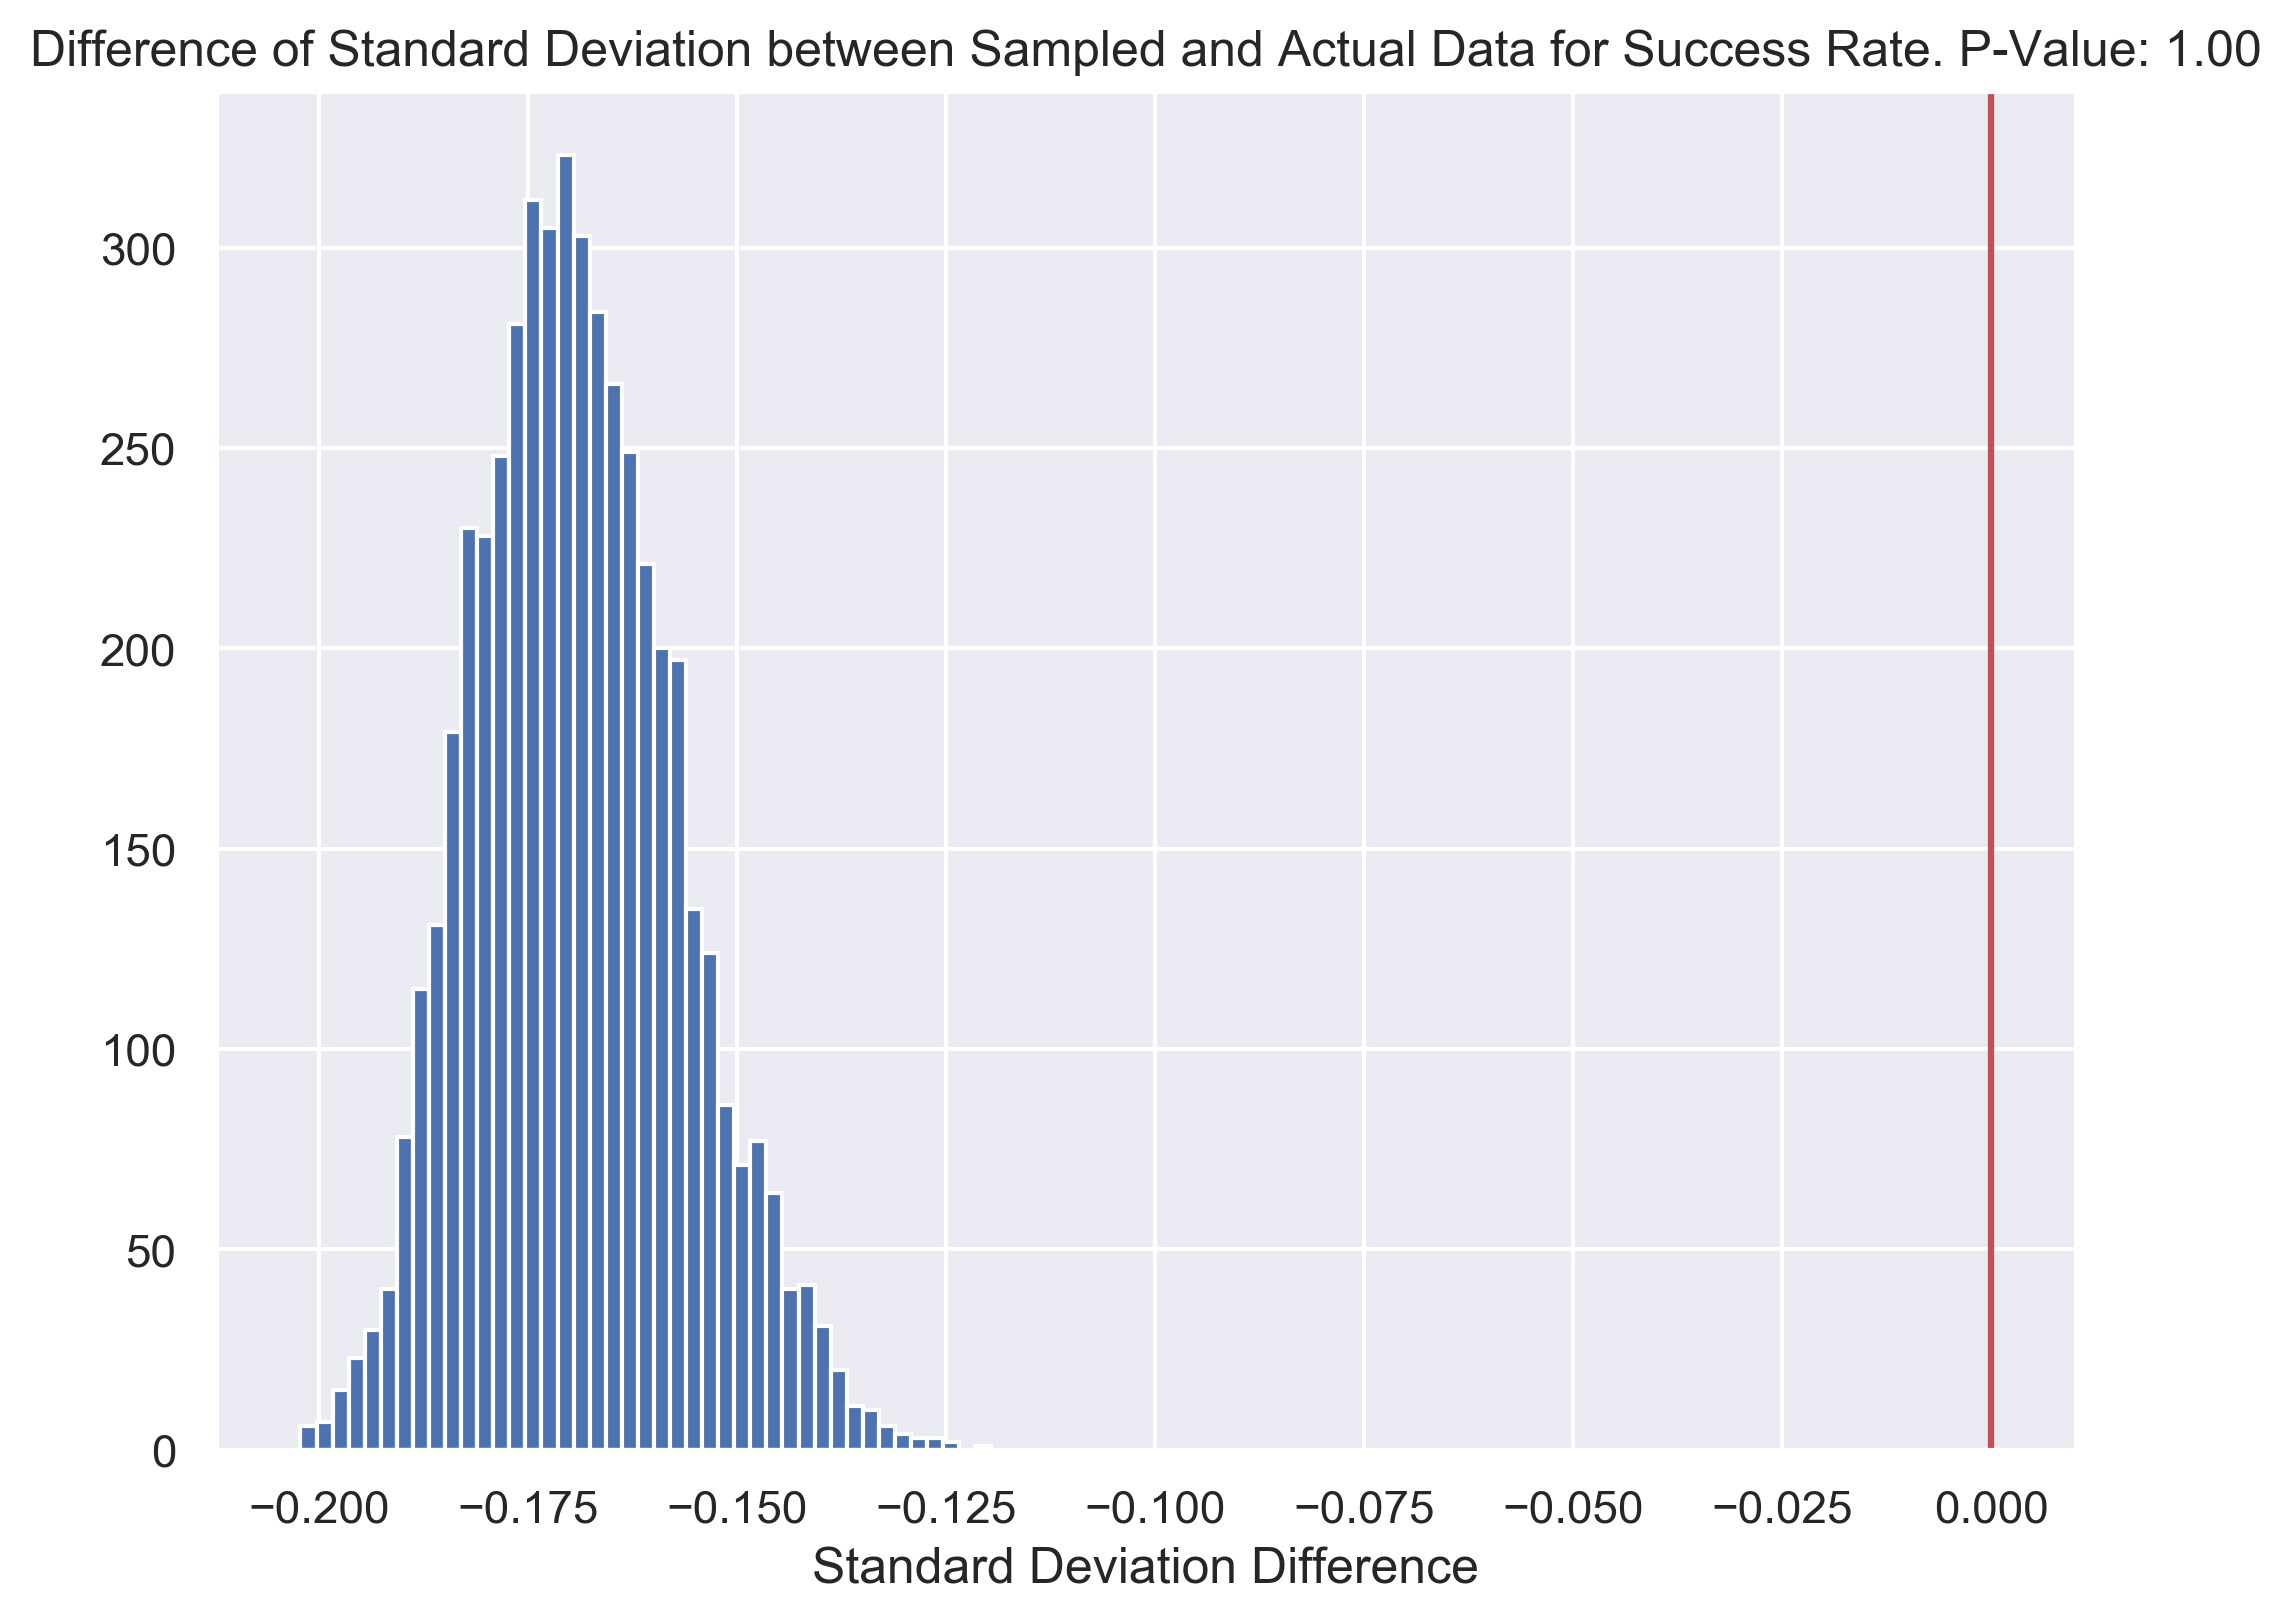

In [222]:
# test statistics function:
# the difference between the success rate standard deviations from the simulated data and actual data
def test_function(sd_success_p_control):
    # generate sampling data using known parameters alpha, beta, with a size 0f 6 for 5000 times
    sd_samples = [np.std(sts.beta.rvs(alpha, beta, size=6)) for i in range(5000)]
    # the difference of standard diviation between sampling data and actual data
    return sd_samples - sd_success_p_control
p_sd_diff = test_function(sd_success_p_control)

plt.figure(figsize = (8,6), dpi = 300)
# historgram showing the SD difference for success rate between the sampled and actual data
plt.hist(p_sd_diff, bins = 'auto') 
# vertical line showing the desirable sd difference mean, which is 0.
plt.axvline(0, color = 'r')
plt.title('Difference of Standard Deviation between Sampled and Actual Data for Success Rate. P-Value: %.2f' % ((np.sum(p_sd_diff < 0))/len(p_sd_diff)))
plt.xlabel('Standard Deviation Difference')
plt.show()


The idea p-value should be around 0.5, and the historgram should have a half above 0, and a half below 0. This is because if our model is good, then the standard deviation from the sampled results should be similar to standard deviation from the actual data.

However, as we can see from the plot above, the histogram is way away from the vertical line, meaning our model is really bad. Also, the p-value is 1, above the threshold of 0.95, which implies that there's a signigicant deficiency in our model, and we may need to consider using seperate hyperparameters for different groups (aka. hierarchical model).